In [122]:
# importing libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
import warnings
warnings.simplefilter('ignore')

In [124]:
# loading the dataset
data = pd.read_csv('master.csv')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9    gdp_for_year      27820 non-null  object 
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [126]:
data.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [127]:
data.dtypes

country               object
year                   int64
sex                   object
age                   object
suicides_no            int64
population             int64
suicides/100k pop    float64
country-year          object
HDI for year         float64
 gdp_for_year         object
gdp_per_capita         int64
generation            object
dtype: object

## EDA

In [128]:
# data cleaning
data['gdp_for_year'] = data[' gdp_for_year']    # this is used to removing the extra space

In [129]:
data.drop([' gdp_for_year'], axis=1,inplace=True)

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9   gdp_per_capita     27820 non-null  int64  
 10  generation         27820 non-null  object 
 11  gdp_for_year       27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [131]:
data["gdp_for_year"] = data.gdp_for_year.str.replace(",","")    # this is used to remove the comma

In [132]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita,generation,gdp_for_year
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,796,Generation X,2156624900
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,796,Silent,2156624900
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,796,Generation X,2156624900
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,796,G.I. Generation,2156624900
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,796,Boomers,2156624900


In [133]:
data["gdp_for_year"] = data["gdp_for_year"].astype(float)    # now coverting object to float

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9   gdp_per_capita     27820 non-null  int64  
 10  generation         27820 non-null  object 
 11  gdp_for_year       27820 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 2.5+ MB


## Countplot for generation

<AxesSubplot:xlabel='generation', ylabel='count'>

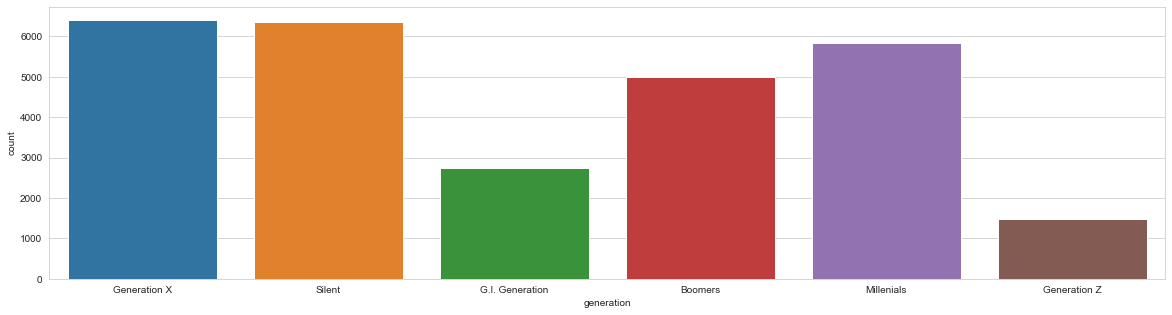

In [135]:
plt.figure(figsize=(20,5))
sns.countplot(data['generation'])

## Label encoding

In [136]:
data['sex'].value_counts()

male      13910
female    13910
Name: sex, dtype: int64

In [137]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])


In [138]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita,generation,gdp_for_year
0,Albania,1987,1,15-24 years,21,312900,6.71,Albania1987,NaN,796,Generation X,2.156625e+09
1,Albania,1987,1,35-54 years,16,308000,5.19,Albania1987,NaN,796,Silent,2.156625e+09
2,Albania,1987,0,15-24 years,14,289700,4.83,Albania1987,NaN,796,Generation X,2.156625e+09
3,Albania,1987,1,75+ years,1,21800,4.59,Albania1987,NaN,796,G.I. Generation,2.156625e+09
4,Albania,1987,1,25-34 years,9,274300,3.28,Albania1987,NaN,796,Boomers,2.156625e+09


In [139]:
le_1 = LabelEncoder()
data['generation'] = le_1.fit_transform(data['generation'])

In [140]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita,generation,gdp_for_year
0,Albania,1987,1,15-24 years,21,312900,6.71,Albania1987,NaN,796,2,2.156625e+09
1,Albania,1987,1,35-54 years,16,308000,5.19,Albania1987,NaN,796,5,2.156625e+09
2,Albania,1987,0,15-24 years,14,289700,4.83,Albania1987,NaN,796,2,2.156625e+09
3,Albania,1987,1,75+ years,1,21800,4.59,Albania1987,NaN,796,1,2.156625e+09
4,Albania,1987,1,25-34 years,9,274300,3.28,Albania1987,NaN,796,0,2.156625e+09


In [141]:
data = data.fillna(0)

In [142]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita,generation,gdp_for_year
0,Albania,1987,1,15-24 years,21,312900,6.71,Albania1987,0.0,796,2,2.156625e+09
1,Albania,1987,1,35-54 years,16,308000,5.19,Albania1987,0.0,796,5,2.156625e+09
2,Albania,1987,0,15-24 years,14,289700,4.83,Albania1987,0.0,796,2,2.156625e+09
3,Albania,1987,1,75+ years,1,21800,4.59,Albania1987,0.0,796,1,2.156625e+09
4,Albania,1987,1,25-34 years,9,274300,3.28,Albania1987,0.0,796,0,2.156625e+09


In [143]:
data.drop(columns=['country','age','country-year'], axis = 1, inplace=True)

In [144]:
data.head()

,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita,generation,gdp_for_year
0,1987,1,21,312900,6.71,0.0,796,2,2.156625e+09
1,1987,1,16,308000,5.19,0.0,796,5,2.156625e+09
2,1987,0,14,289700,4.83,0.0,796,2,2.156625e+09
3,1987,1,1,21800,4.59,0.0,796,1,2.156625e+09
4,1987,1,9,274300,3.28,0.0,796,0,2.156625e+09


## Comparing numbers of suicides between both the sexes

<AxesSubplot:xlabel='sex', ylabel='suicides_no'>

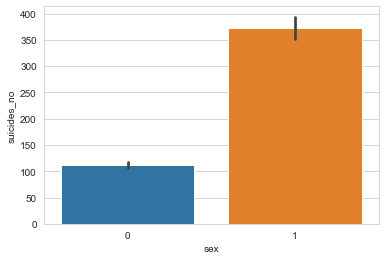

In [145]:
sns.barplot(x='sex',y='suicides_no',data=data)

# GDP over the given years

<AxesSubplot:xlabel='year', ylabel='gdp_for_year'>

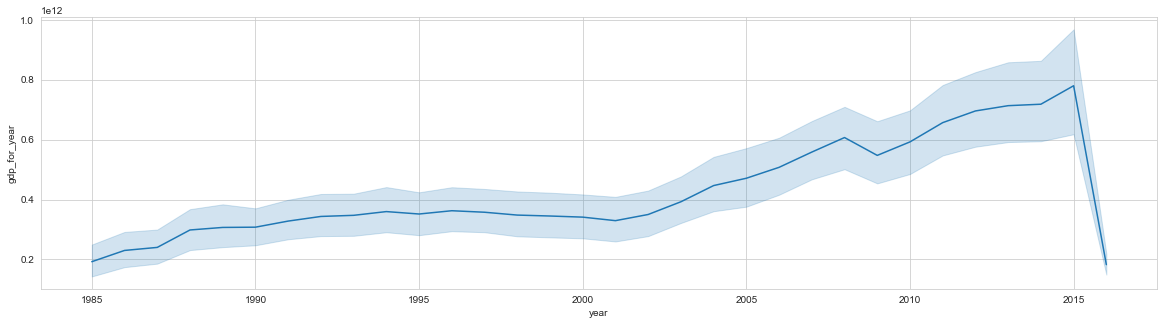

In [146]:
plt.figure(figsize=(20,5))
sns.lineplot(x ='year', y= 'gdp_for_year', data = data)

## suicides rate over the given period between both the genders

<AxesSubplot:xlabel='year', ylabel='suicides_no'>

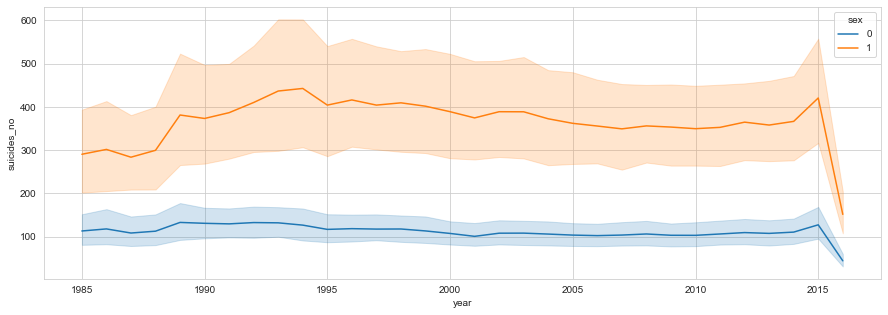

In [147]:
plt.figure(figsize=(15,5))
sns.lineplot(x = 'year',y='suicides_no', data=data,hue='sex')

In [148]:
data.dtypes

year                   int64
sex                    int32
suicides_no            int64
population             int64
suicides/100k pop    float64
HDI for year         float64
gdp_per_capita         int64
generation             int32
gdp_for_year         float64
dtype: object

## using correlation heatmap to find important features and their relations with other features

In [149]:
data.corr()

,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita,generation,gdp_for_year
year,1.000000e+00,-1.577200e-16,-0.004546,0.008850,-0.039037,3.431898e-01,3.391343e-01,2.683006e-01,9.452857e-02
sex,-1.577200e-16,1.000000e+00,0.144629,-0.011242,0.391496,7.337812e-17,-2.964946e-16,-2.929210e-17,-1.386038e-15
suicides_no,-4.545958e-03,1.446292e-01,1.000000,0.616162,0.306604,-1.730773e-02,6.132975e-02,-7.062371e-02,4.300959e-01
population,8.850170e-03,-1.124208e-02,0.616162,1.000000,0.008285,9.374731e-03,8.150986e-02,-6.796261e-02,7.106973e-01
suicides/100k pop,-3.903680e-02,3.914965e-01,0.306604,0.008285,1.000000,-2.290278e-02,1.785134e-03,-4.982007e-02,2.523964e-02
HDI for year,3.431898e-01,7.337812e-17,-0.017308,0.009375,-0.022903,1.000000e+00,2.165182e-01,4.865837e-02,7.375306e-02
gdp_per_capita,3.391343e-01,-2.964946e-16,0.061330,0.081510,0.001785,2.165182e-01,1.000000e+00,8.289921e-02,3.034045e-01
generation,2.683006e-01,-2.929210e-17,-0.070624,-0.067963,-0.049820,4.865837e-02,8.289921e-02,1.000000e+00,2.125070e-02
gdp_for_year,9.452857e-02,-1.386038e-15,0.430096,0.710697,0.025240,7.375306e-02,3.034045e-01,2.125070e-02,1.000000e+00


<AxesSubplot:>

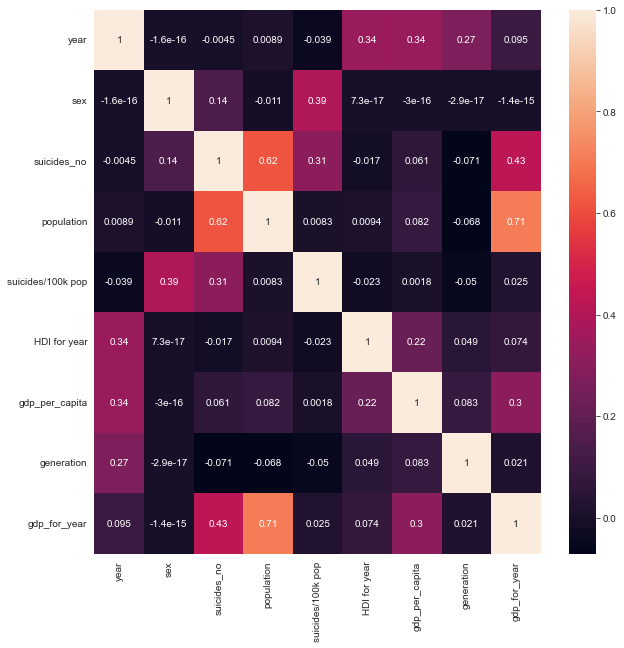

In [150]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

In [151]:
X = data.drop('suicides_no', axis = 1)
y = data['suicides_no']

## Density plot for population

In [152]:
sns.set_style('whitegrid')


<AxesSubplot:xlabel='population', ylabel='Density'>

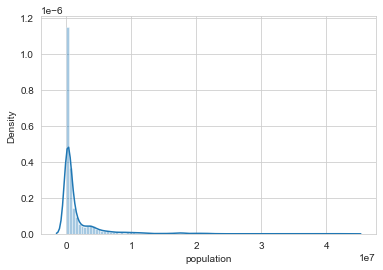

In [153]:
sns.distplot(X['population'], bins=100)

<AxesSubplot:xlabel='population', ylabel='Density'>

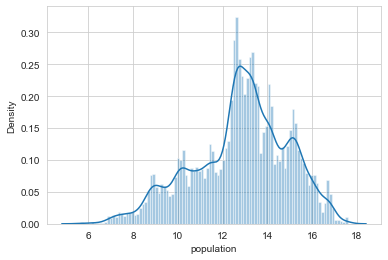

In [154]:
sns.distplot(np.log(X['population']), bins=100)

## studying trends between year and suicide numbers

<AxesSubplot:xlabel='year', ylabel='suicides_no'>

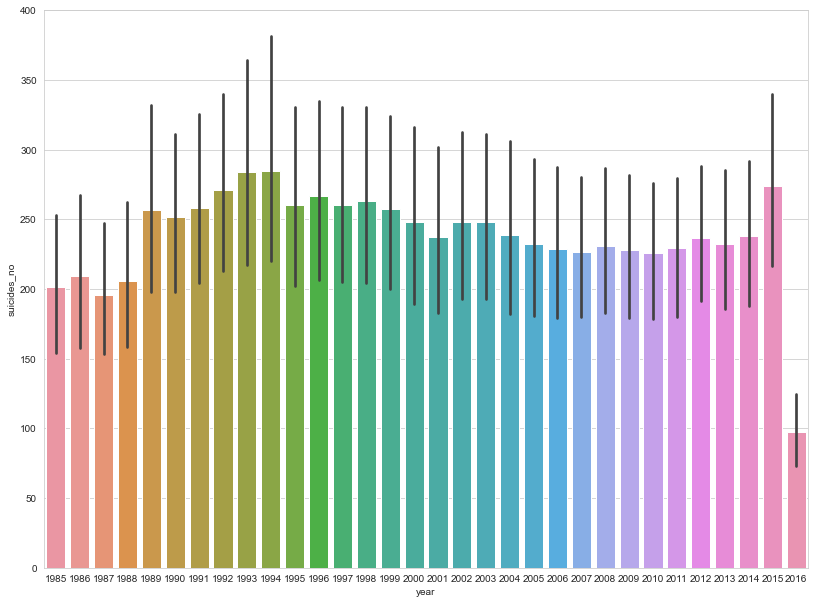

In [155]:
fig, ax = plt.subplots()
fig.set_size_inches(13.7,10.27)
sns.barplot(x = 'year', y = 'suicides_no', data=data,ax=ax)

## studying trends between year and population

<AxesSubplot:xlabel='year', ylabel='population'>

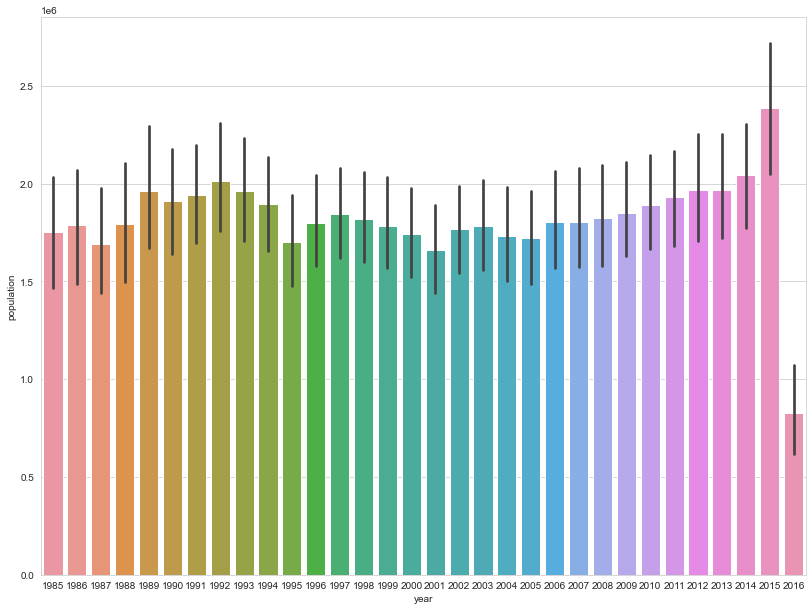

In [156]:
fig, ax = plt.subplots()
fig.set_size_inches(13.7,10.27)
sns.barplot(x = 'year', y = 'population', data=X)

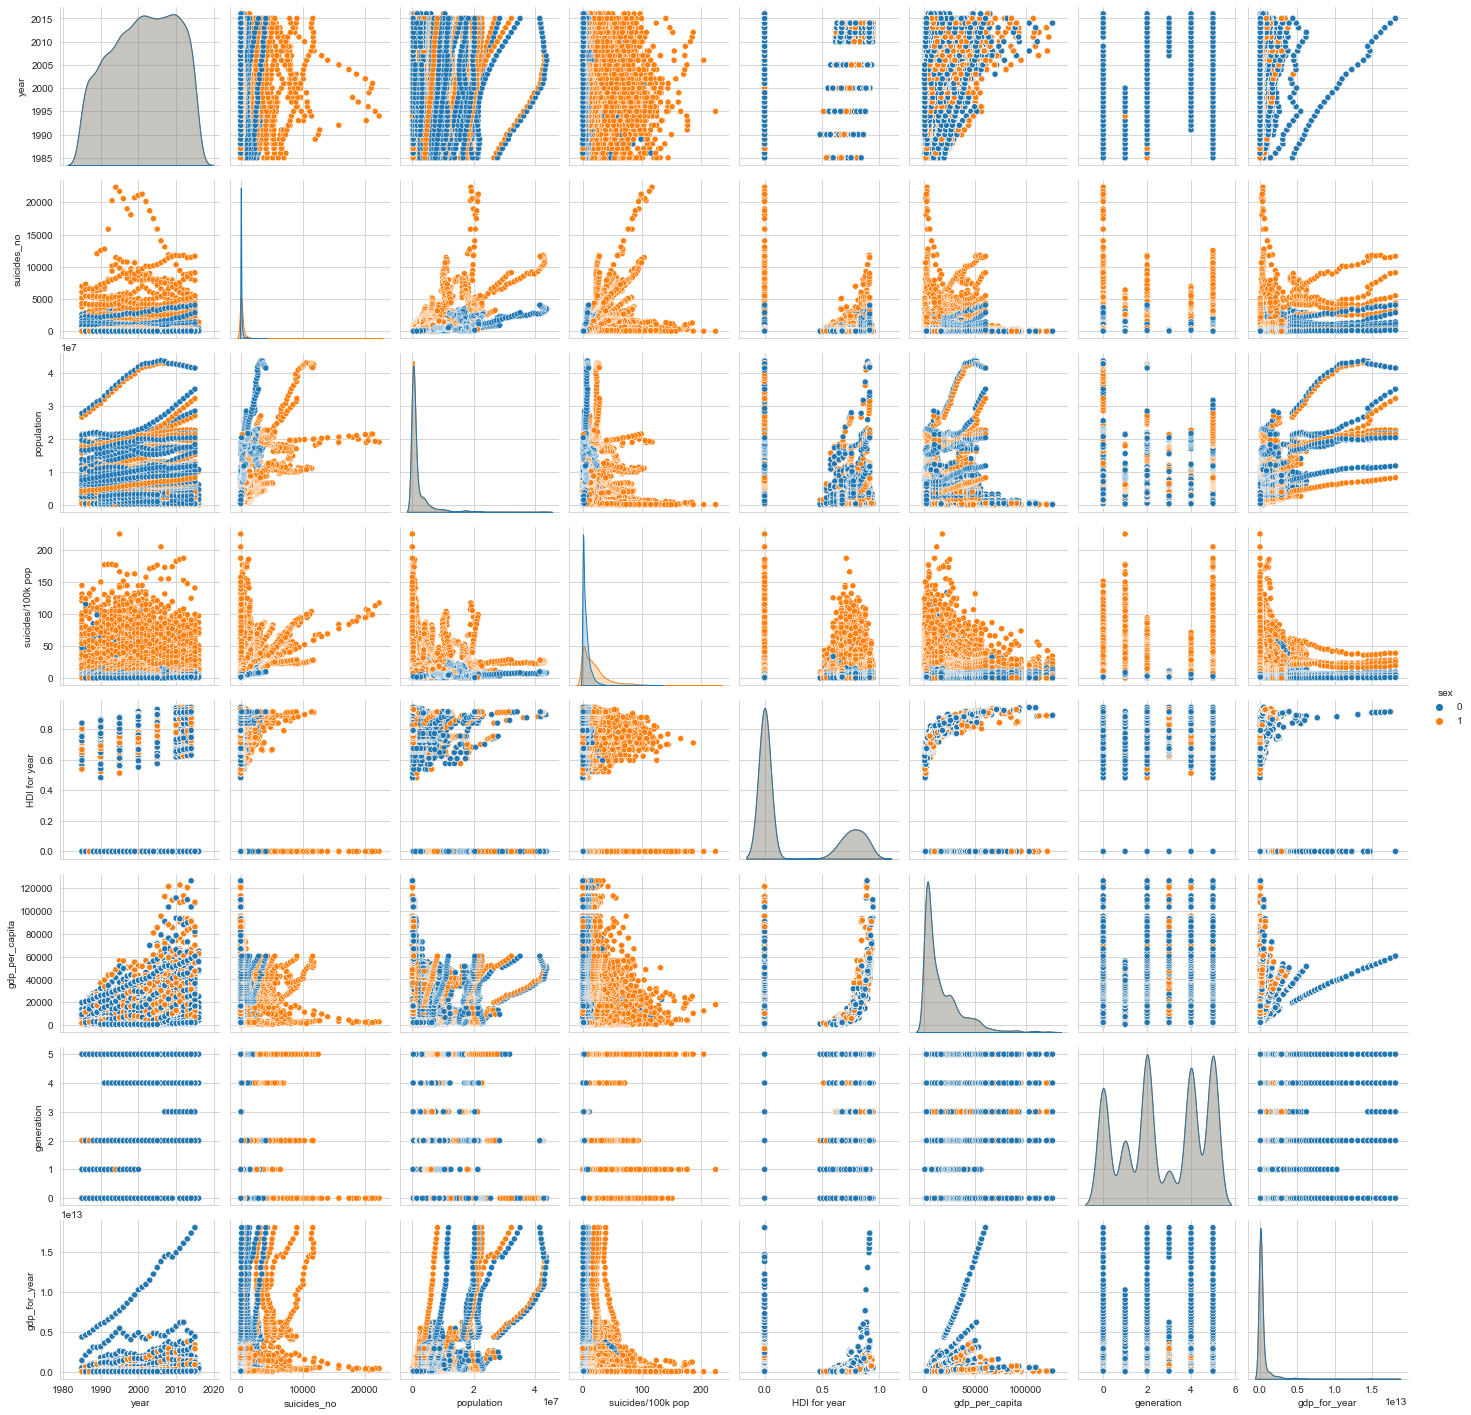

In [157]:
sns.pairplot(data,hue = 'sex')

## Model building

In [158]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y)

## Importing algorithms

In [164]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50,random_state=0 , criterion='mse')
rf.fit(X_train,y_train)

RandomForestRegressor(criterion='mse', n_estimators=50, random_state=0)

In [167]:
y_pred_1 = rf.predict(X_test)

In [160]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [168]:
y_pred_2 = dt.predict(X_test)

In [165]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [169]:
y_pred_3 = lr.predict(X_test)

## calculating and printing the accuracy

In [172]:
from sklearn import metrics
print('Random forest RMSE : ' , np.sqrt(metrics.mean_squared_error(y_test,y_pred_1)))

Random forest RMSE :  892.1813329912426


In [173]:
print('Decision tree RMSE : ' , np.sqrt(metrics.mean_squared_error(y_test,y_pred_2))) 

Decision tree RMSE :  64.9354786775731


In [174]:
print('Linear regression RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred_3)))

Linear regression RMSE:  634.1426047351134


In [176]:
dt.score(X_test,y_test) # This score is for Decision tree regressor

0.9944397863989569

## The parameters which is resposible for suicides rate is depends on [Population and GDP per year] and through our data male commits more suidices as compaired to female